# 绘制类别型数据

# 目录
+ 类别散点图
    + sns.stripplot()
        + jitter参数
    + sns.swarmplot()
        + 条件于第3个变量
    + 类别型变量在图表中的位置顺序
    + 绘制水平类别散点图


+ 类别分布图
    + sns.boxplot()
    + sns.violinplot()
    + sns.swarmplot()与sns.violinplot()、sns.boxplot()的结合


+ 类别统计估计图
    + sns.barplot()
    + sns.countplot()
    + sns.pointplot()


+ 绘制宽格式的数据


+ x，y参数


+ 设置图表的大小、坐标系


+ 绘制分面类别图
    + kind参数设置图表种类
    + 分面
    + 设置图表的大小


+ PairGrid对象



+ Axis grids对象

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
%matplotlib inline

It's useful to divide seaborn's categorical plots into three groups: 
+ those that show each observation at each level of the categorical variable  
swarmplot()、stripplot()


+ those that show an abstract representation of each **distribution** of observations  
boxplot()、violinplot()


+ those that apply a statistical estimation to show a measure of central tendency and confidence interval  
barplot()、pointplot()


+ high-level function  
factorplot()和FacetGrid对象

In [2]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## 类别散点图

### sns.stripplot()
当一个变量是类别型变量，另一个变量是连续型变量

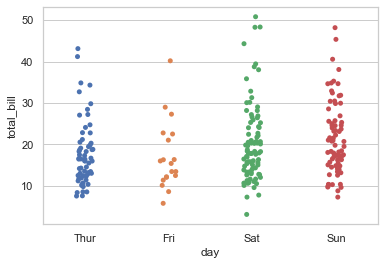

In [3]:
sns.stripplot(x="day", y="total_bill", data=tips)

#### jitter参数

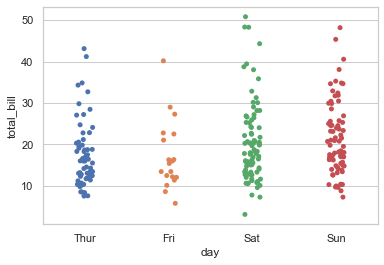

In [4]:
# jitter=True，使散点在类别变量轴方向扰动，更容易看清连续型变量的分布，解决散点重叠问题
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True) 

### sns.swarmplot()
采用特定算法，将散点放置在类别变量轴上，更容易看清连续型变量的分布，解决散点重叠问题

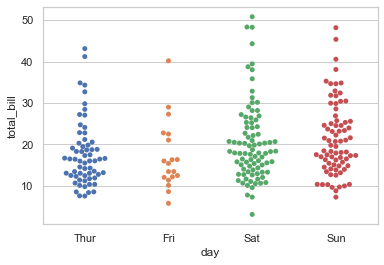

In [5]:
sns.swarmplot(x="day", y="total_bill", data=tips)

#### 第3个参数hue

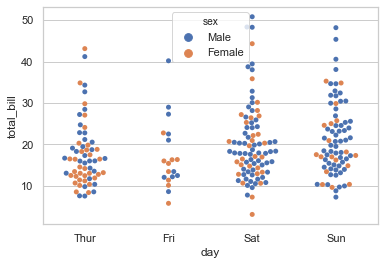

In [6]:
# 将第3个类别型变量赋予hue参数
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips) 

### 类别型变量在图表中的位置顺序
+ pandas中的Categorical数据类型  
在pandas中可以设置变量的顺序（Python数据分析一书中没有，Categorical数据类型是后来加入的）


+ 其他数据类型
    + 字符串型类别变量  
    按照在DataFrame中出现的顺序
    + 数值型类别变量  
    按照数值大小顺序

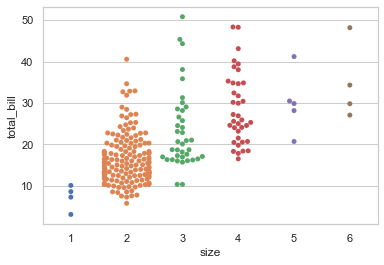

In [7]:
# 数值型类别变量，变量在图表中的位置，按数值大小排序
sns.swarmplot(x="size", y="total_bill", data=tips) 

### 绘制水平类别散点图

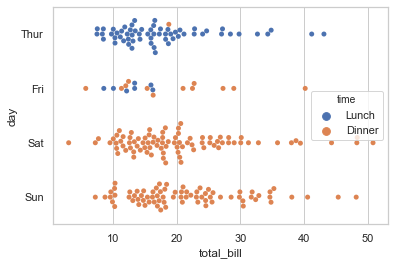

In [8]:
# 将类别型变量赋予x，连续型变量赋予y，seaborn可以自动推断出要绘制水平类别散点图
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips) 

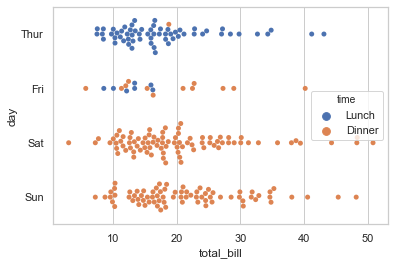

In [9]:
# 当类别型变量是数值型变量时，需要显式设置orient='h'
sns.swarmplot(x="total_bill", y="day", orient='h', hue="time", data=tips) 

## 类别分布图

### sns.boxplot()

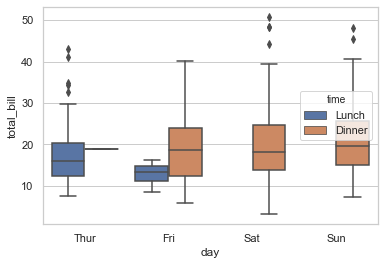

In [10]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

### sns.violinplot()
箱线图和核密度图的结合

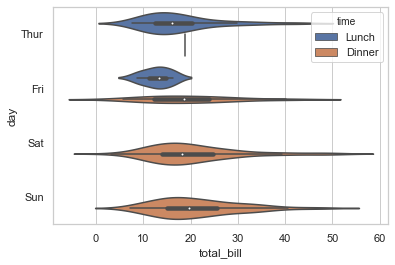

In [11]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)

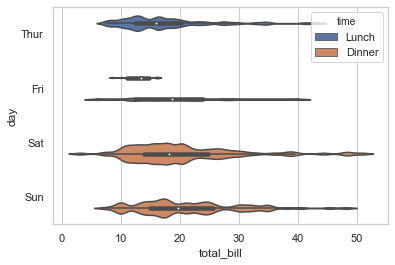

In [12]:
# 小提琴图涉及到核密度图，因而相比于箱线图，有更多参数可以设置
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False) 

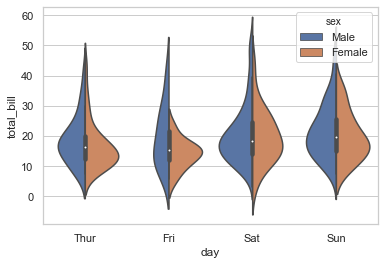

In [13]:
# 当hue变量为二元变量时，可以设置split参数
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True) 

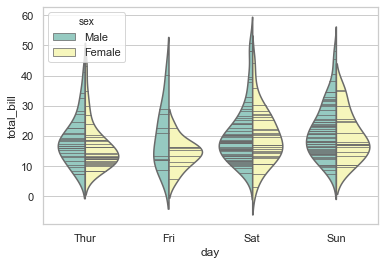

In [14]:
# inner参数控制如何小提琴的内部，inner="stick"为每个观察值绘制一条stick
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3") 

### sns.swarmplot()与sns.violinplot()、sns.boxplot()的结合

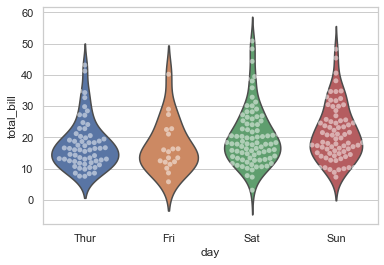

In [15]:
# 注意设置inner=None，去除小提琴内部的box
sns.violinplot(x="day", y="total_bill", data=tips, inner=None) 
# 注意设置alpha参数，调整散点透明度
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5) 

## 类别统计估计图

### sns.barplot()

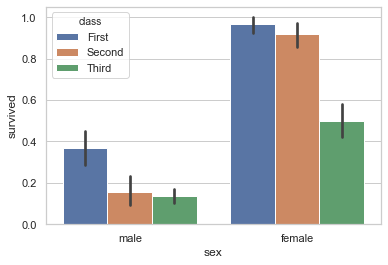

In [16]:
# 计算每一类别中，连续型变量的均值，用bar的高度进行展示
# 通过自助法来计算每一个类别中连续型变量的置信区间，并用误差条进行展示
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

### sns.countplot()
简单的条形图（条的长度表示该类别中变量的个数）

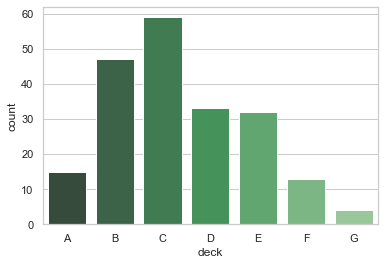

In [17]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")

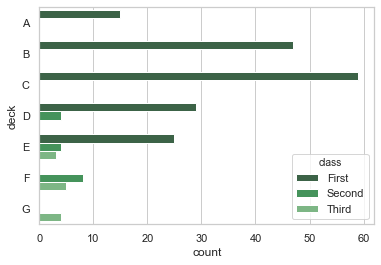

In [18]:
# 设置hue参数
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d") 

### sns.pointplot()

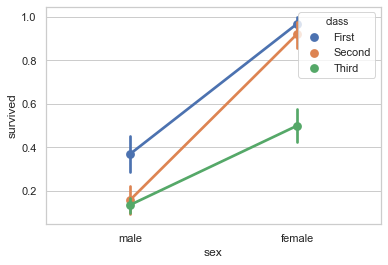

In [19]:
# 均值用点而非bar的高度展示
# 同样会绘制置信区间，用误差条展示
# 用直线连接同一个hue类别内的点，利于观察连续型变量均值随着类别型变量的变动而变动的趋势
sns.pointplot(x="sex", y="survived", hue="class", data=titanic)

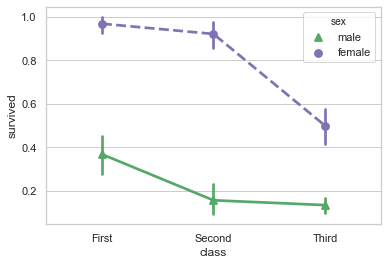

In [20]:
# 设置palette、markers、linestyle参数
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]) 

## 绘制宽格式的数据

In [21]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


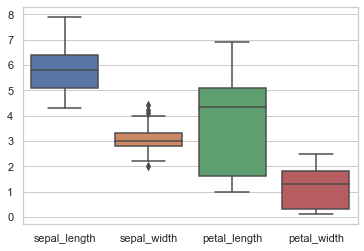

In [22]:
# 宽格式的数据（DataFrame、二维numpy数组等）可以直接传给data，用于绘制类别型数
sns.boxplot(data=iris) 

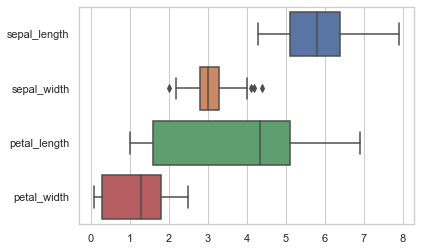

In [23]:
sns.boxplot(data=iris, orient="h")

## x，y参数

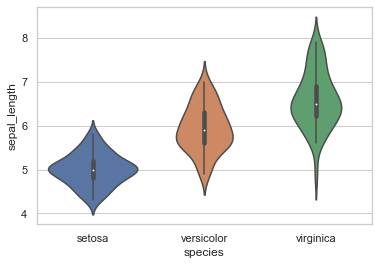

In [24]:
# x，y参数不仅接受字符串形式的列名，还可以接受pandas或numpy对象
sns.violinplot(x=iris.species, y=iris.sepal_length) 

## 设置图表的大小、坐标系

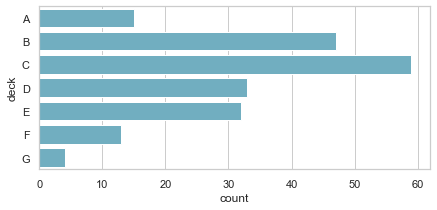

In [25]:
# 通过matplotlib的figsize设置图表的大小，以及绘制的坐标系（可以将多个图表置于同一坐标系）
f, ax = plt.subplots(figsize=(7, 3)) 
sns.countplot(y="deck", data=titanic, color="c")

## 绘制分面类别图
FacetGrid对象 + map方法、sns.catplot() + kind参数，参见第4章“多个变量相对于一个变量的回归线”

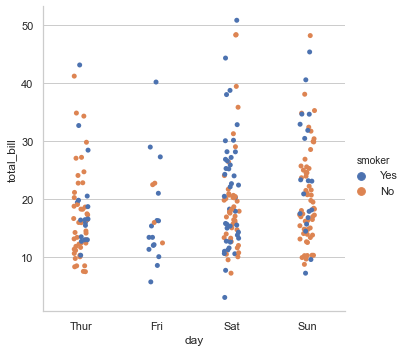

In [26]:
# 默认绘制sns.pointplot()
sns.catplot(x="day", y="total_bill", hue="smoker", data=tips) 

### kind参数设置图表种类
kind : {point, bar, count, box, violin, strip, swarm}

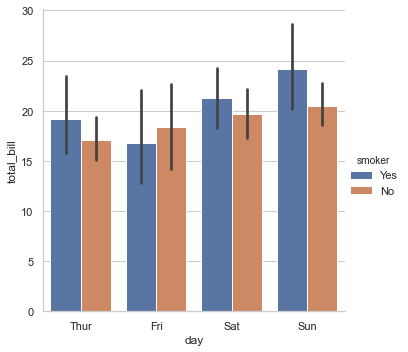

In [27]:
# sns.barplot()
sns.catplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar") 

### 分面
hue、col、row参数，参见第4章中“其他参数”部分

D:\MyPythonWork\data-analysis\venv\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


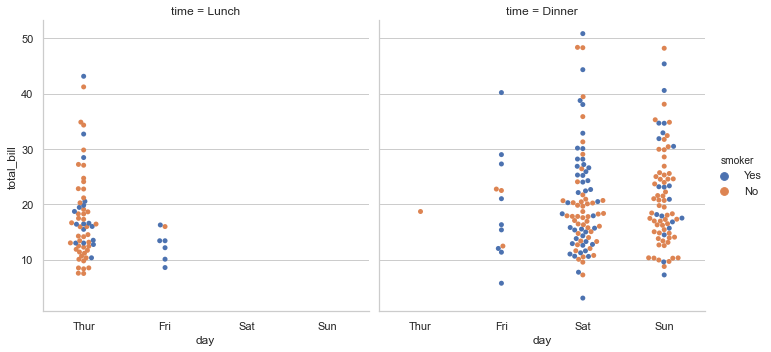

In [28]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm")

### 设置图表的大小
参数height、aspect，参见第4章中sns.lmplot()部分

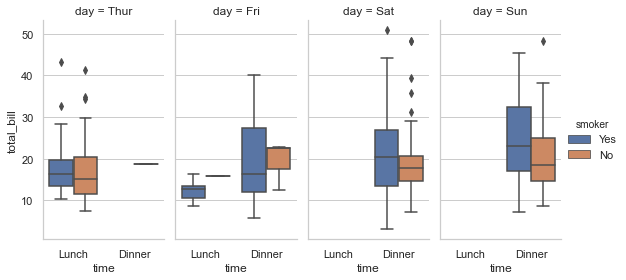

In [29]:
# size、aspect设置的是每个分面的大小
sns.catplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", height=4, aspect=.5) 

## PairGrid对象
注意区别于FacetGrid对象，Facet对象用于条件于其他变量的情况，PairGrid对象用于研究多个变量两两关系的情况  


参见第4章“多个变量相对于一个变量的回归线”部分，第4章用于连续型变量，这里用于类别型变量，本质相同

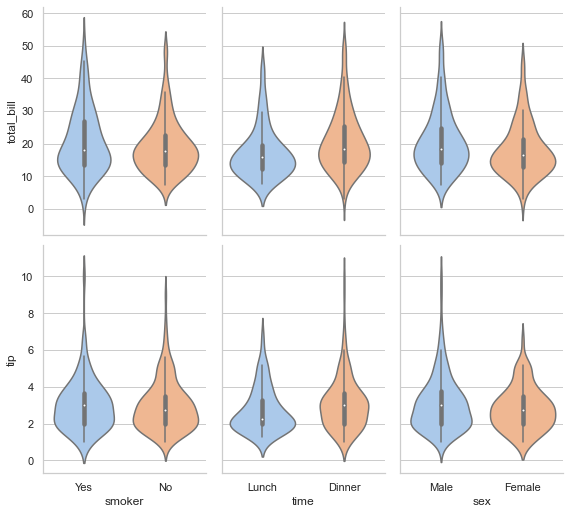

In [30]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, height=3.5)
# pairplot中kind参数只能设置‘scatter’和‘reg’，所以绘制小提琴图只能用PairGrid对象的map方法
g.map(sns.violinplot, palette="pastel") 

## Axis grids对象
+ FacetGrid  
Subplot grid for plotting conditional relationships.
+ PairGrid  
Subplot grid for plotting pairwise relationships in a dataset.
+ JointGrid  
Grid for drawing a bivariate plot with marginal univariate plots.

+ FacetGrid对象 + map方法、sns.factorplot() + kind参数  
第5章“绘制分面类别图”部分

+ PairGrid对象 + map方法、sns.pairplot() + kind参数  
第4章“多个变量相对于一个变量的回归线”部分

+ JointGrid对象 + map方法、sns.jointplot() + kind参数
第3章“JointGrid对象”部分